In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from dython.nominal import associations

In [3]:
df = pd.read_csv('./dataset/train_preprocessed.csv')
df

,Id,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,1,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
1,2,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,3,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,4,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,5,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0
137137,137138,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,137139,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0
137139,137140,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Id                               137141 non-null  int64  
 1   CO2 Emissions(g/km)              137141 non-null  float64
 2   Fuel Consumption City (L/100Km)  131056 non-null  float64
 3   Fuel Consumption Hwy (L/100Km)   130590 non-null  float64
 4   Fuel Consumption Comb (L/100Km)  130651 non-null  float64
 5   Make                             137141 non-null  object 
 6   Vehicle Class                    132009 non-null  object 
 7   Transmission                     126701 non-null  object 
 8   Fuel Type                        129722 non-null  object 
 9   Engine Size(L)                   112808 non-null  float64
 10  Cylinders                        116536 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 11.5+ MB


In [ ]:
df_id = df.pop("Id")

In [ ]:
df.astype("object").describe()

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
count,137141.0,131056.0,130590.0,130651.0,137141,132009,126701,129722,112808.0,116536.0
unique,4508.0,24259.0,26548.0,18408.0,21,16,25,5,42.0,7.0
top,222.0,20.0,0.8,11.9,FOLD,SUV - SMALL,AS6,X,2.0,4.0
freq,1223.0,115.0,147.0,169.0,18081,27799,28926,83001,21216.0,66618.0


In [ ]:
df.describe()

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
count,137141.000000,131056.000000,130590.000000,130651.000000,112808.000000,116536.000000
mean,250.471627,14.057939,10.517293,12.460682,2.989195,5.157514
std,76.956554,9.903512,7.577107,6.606855,1.241603,1.570250
min,96.000000,0.000006,0.000875,0.046700,1.000000,3.000000
25%,201.000000,6.390000,4.610000,7.603038,2.000000,4.000000
50%,234.000000,12.650000,9.337068,11.627907,2.500000,4.000000
75%,291.000000,19.879029,14.940000,16.339869,3.600000,6.000000
max,822.111635,92.592593,68.027211,62.893082,8.400000,12.000000


In [ ]:
df.isna().sum()

CO2 Emissions(g/km)                    0
Fuel Consumption City (L/100Km)     6085
Fuel Consumption Hwy (L/100Km)      6551
Fuel Consumption Comb (L/100Km)     6490
Make                                   0
Vehicle Class                       5132
Transmission                       10440
Fuel Type                           7419
Engine Size(L)                     24333
Cylinders                          20605
dtype: int64

<Axes: >

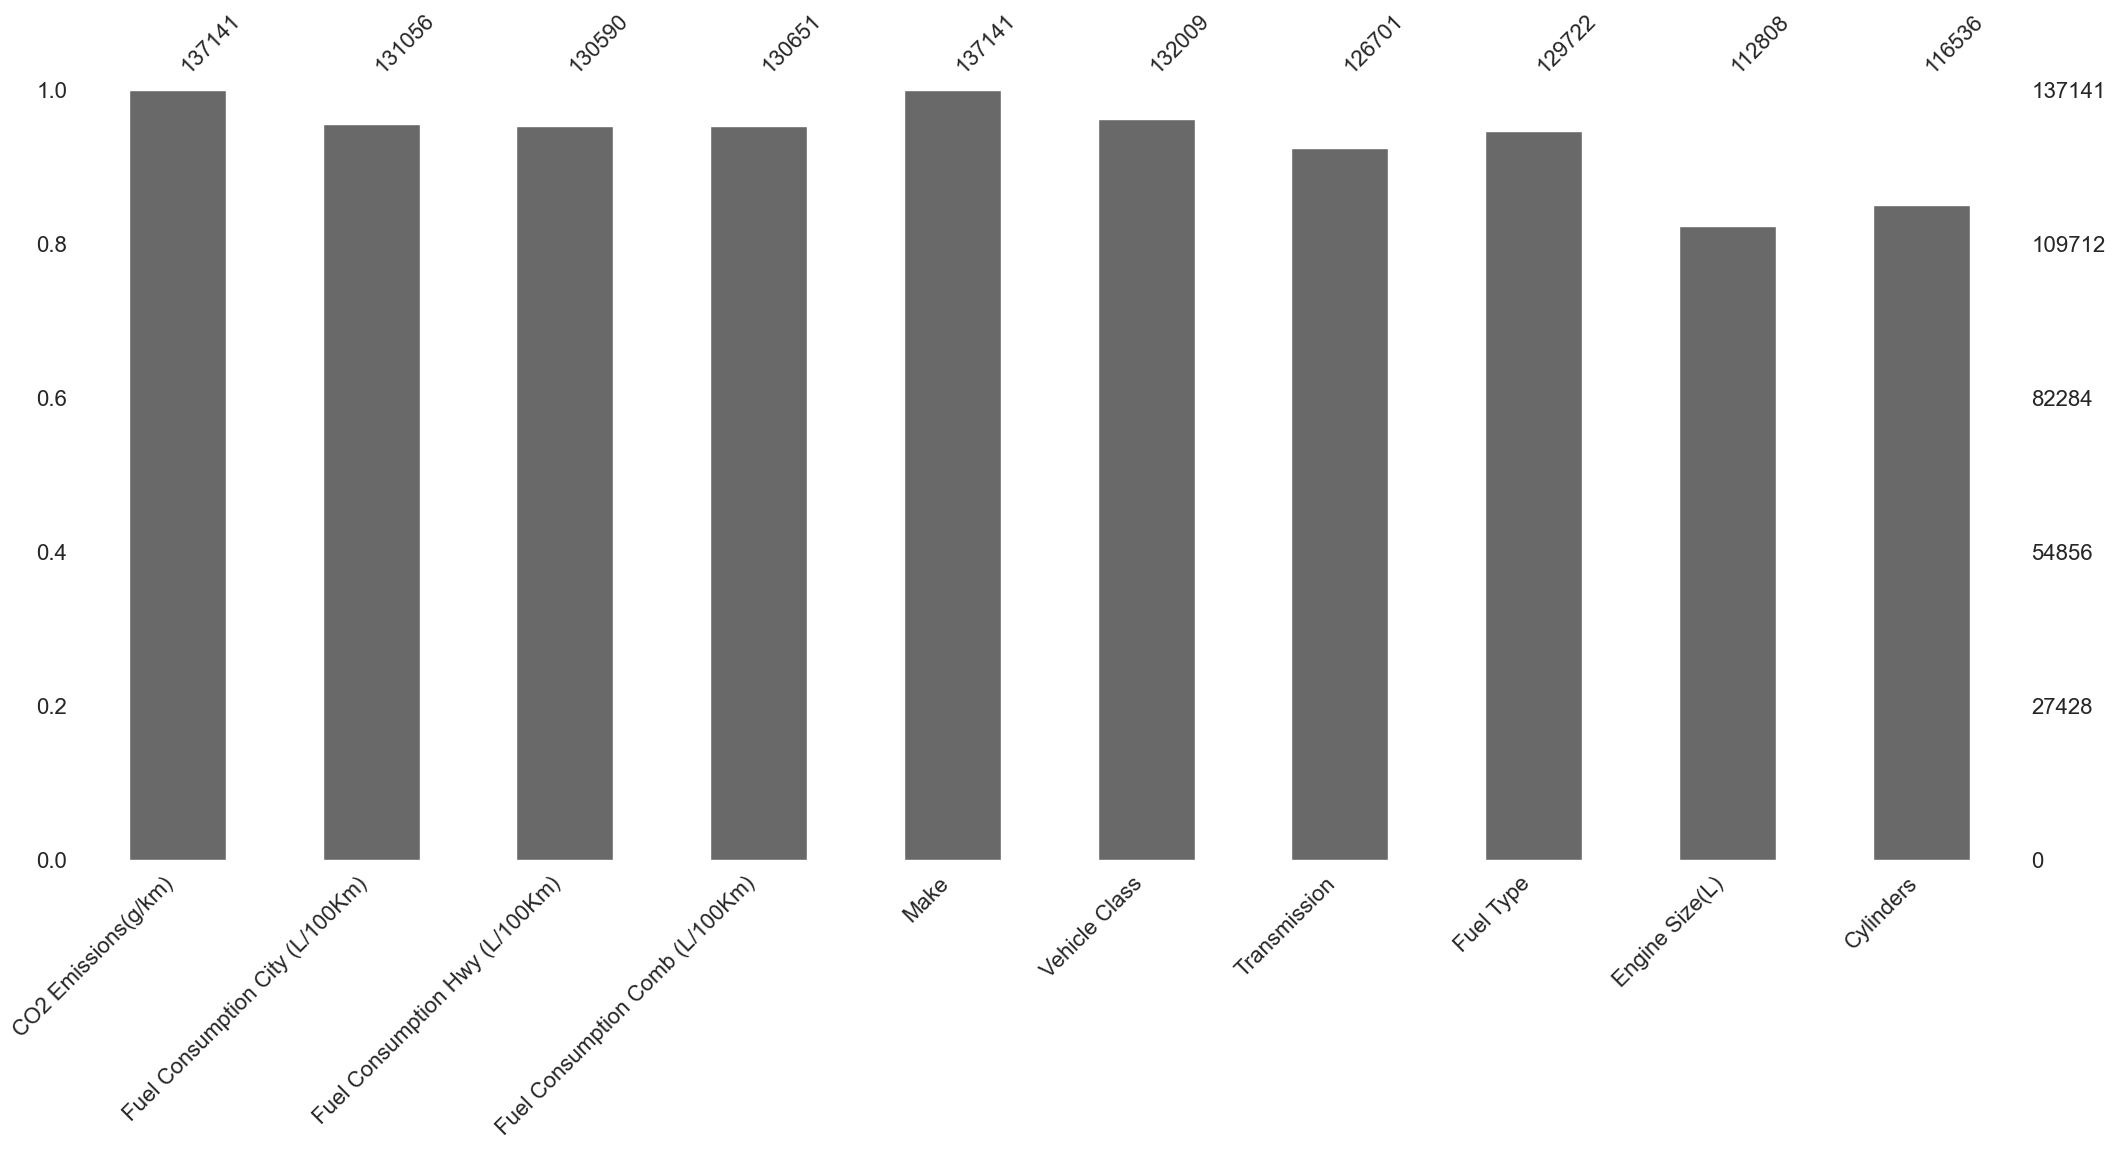

In [ ]:
msno.bar(df)

<Axes: >

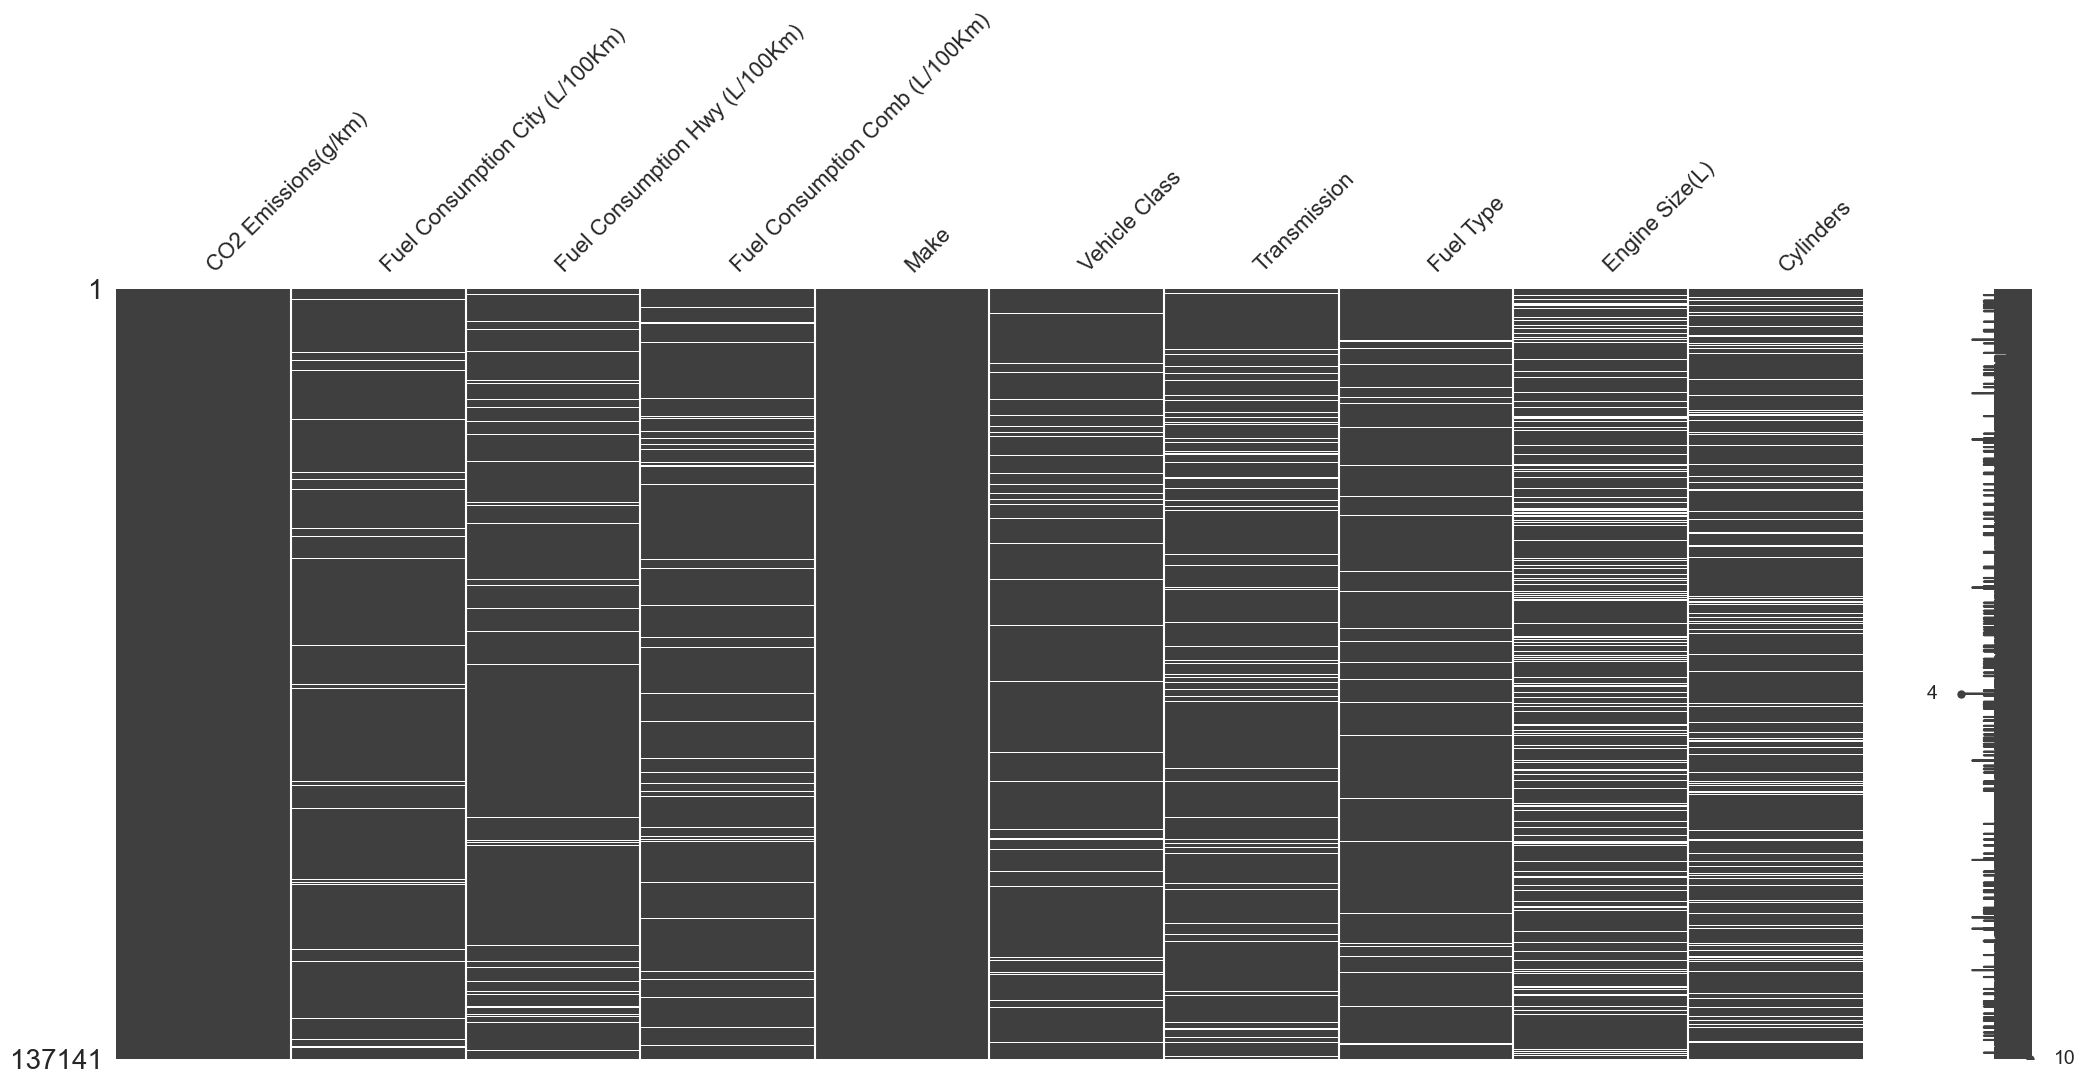

In [ ]:
msno.matrix(df)

<Axes: >

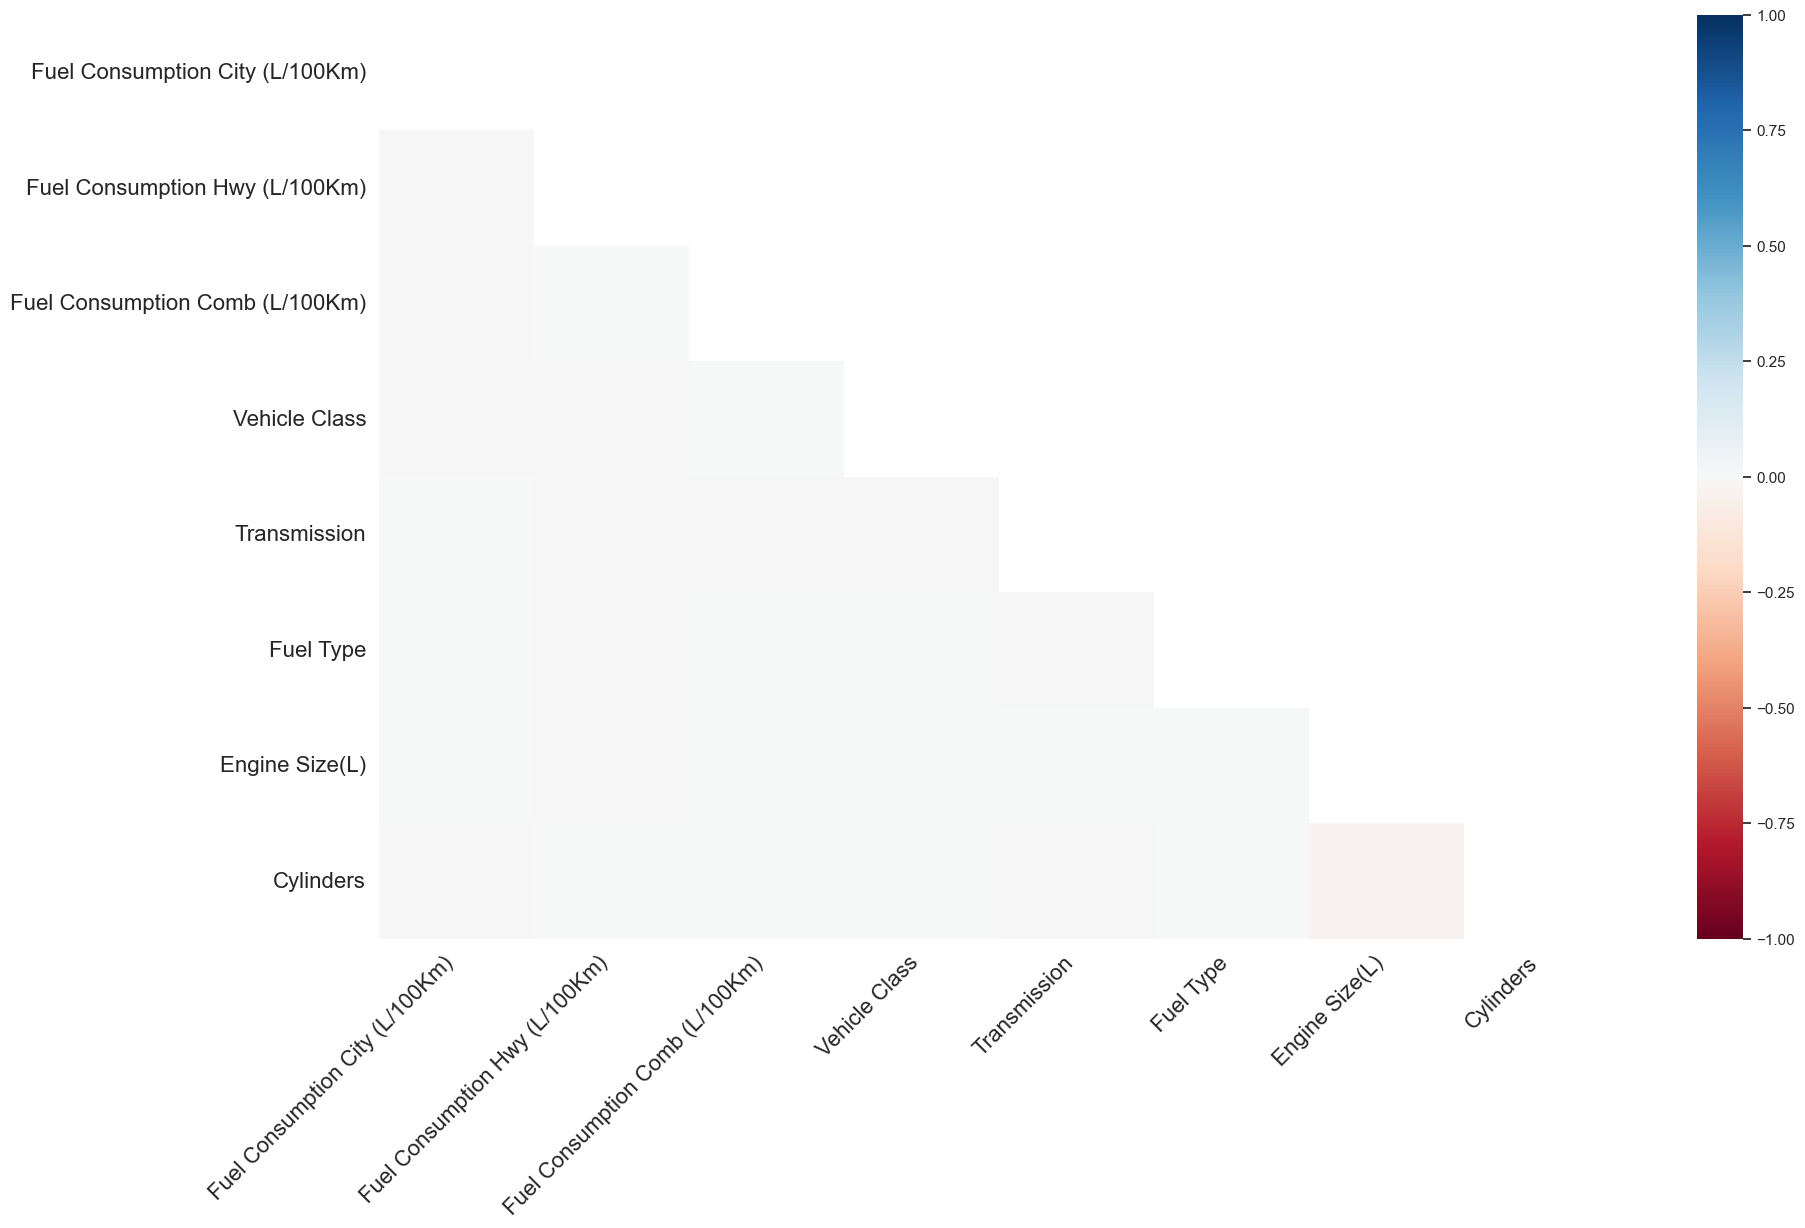

In [ ]:
msno.heatmap(df)

# Data Visualization

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

In [ ]:
df_categorical = pd.concat([df_categorical, df["CO2 Emissions(g/km)"]], axis=1)

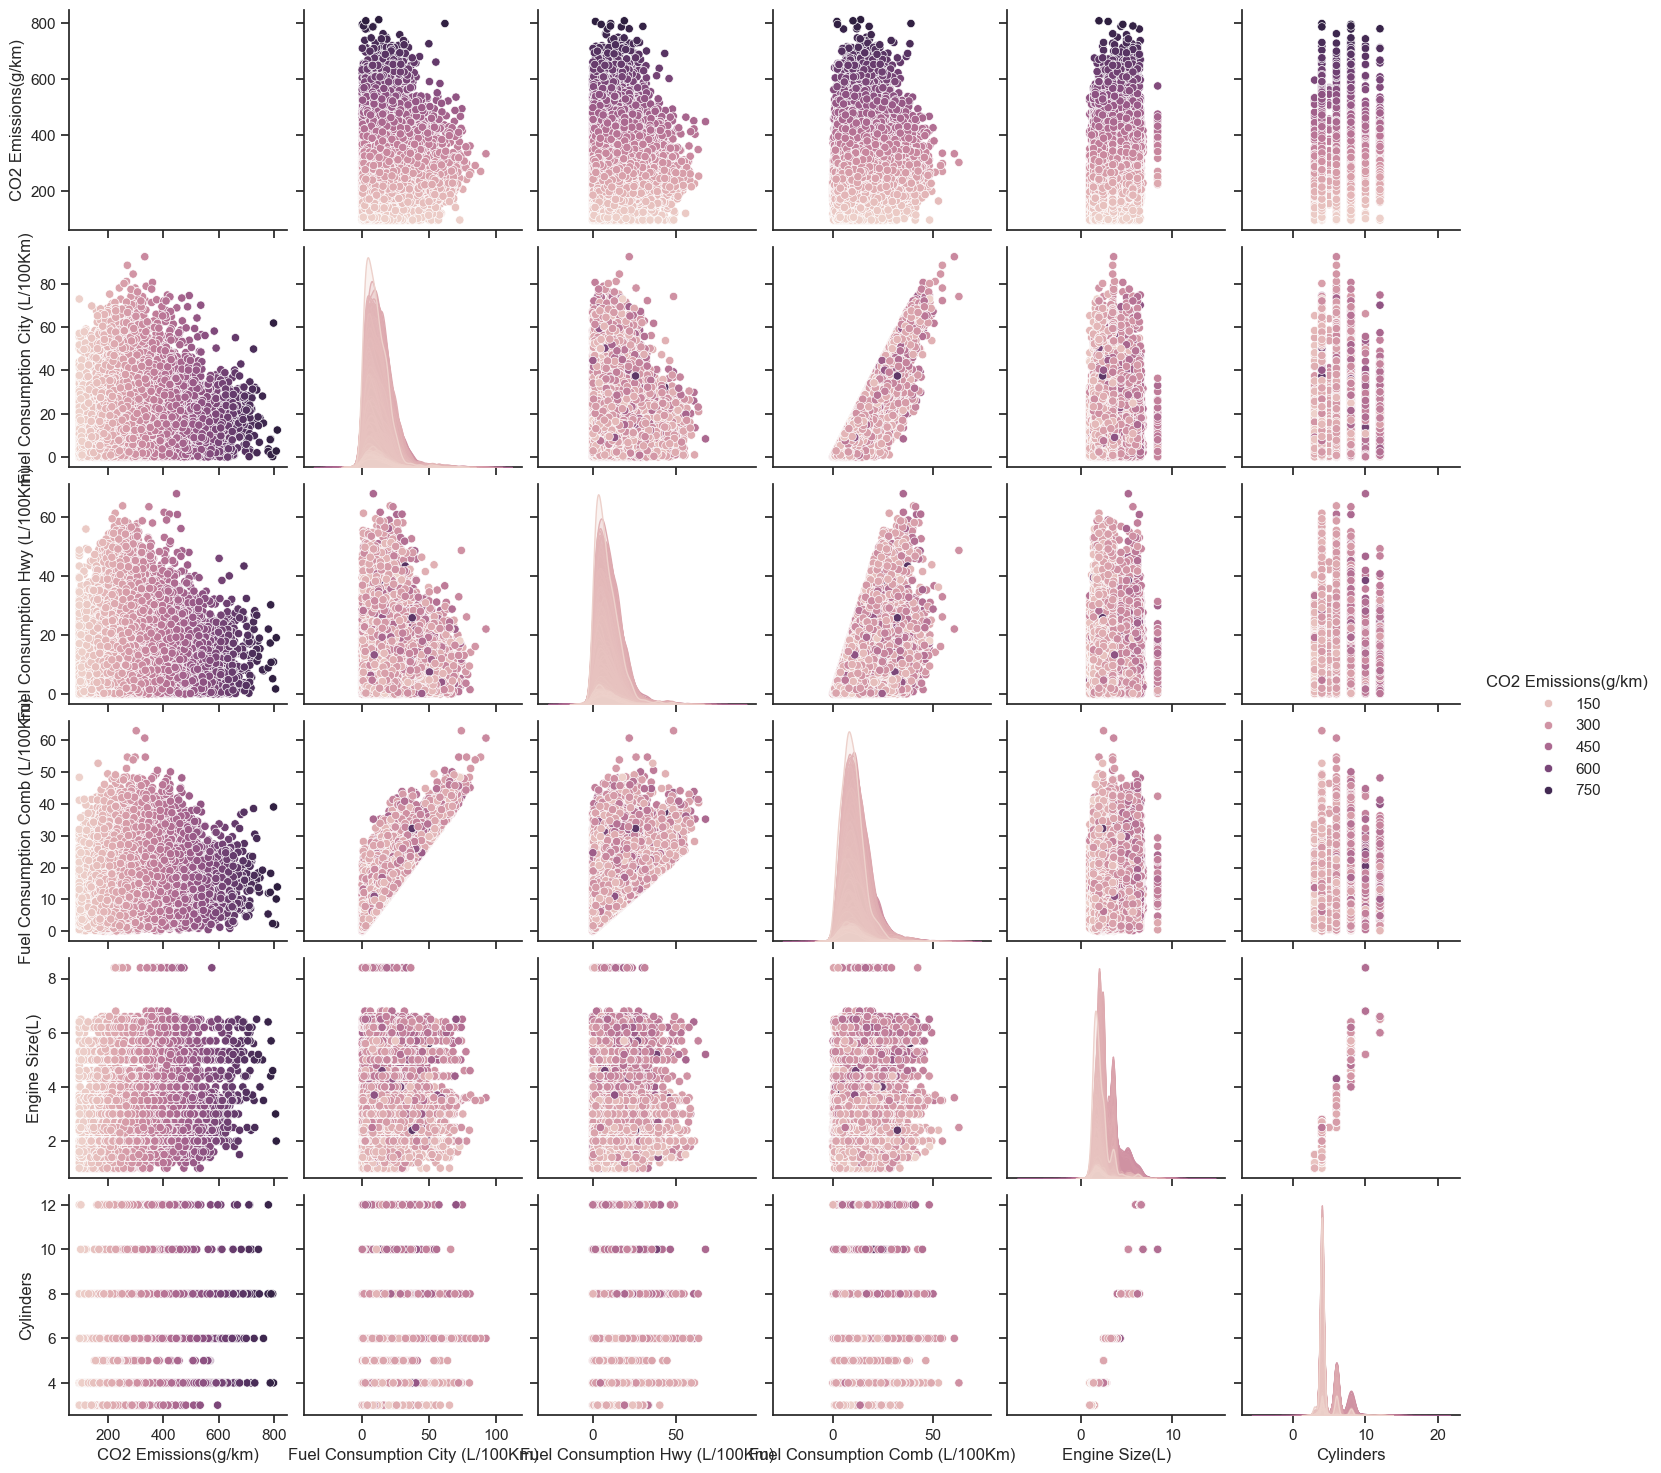

In [ ]:
# Define the sample size you want
sample_size = 100000

# Create a random sample
sample_df = df_numerical.sample(n=sample_size)

# Set Seaborn style
sns.set(style="ticks", color_codes=True)

# Create a pairplot
sns.pairplot(sample_df, hue="CO2 Emissions(g/km)", vars=df_numerical.columns.tolist())

In [ ]:
df_numerical

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders
0,306.0,8.640000,6.140000,7.514791,3.5,6.0
1,283.0,27.270000,30.760000,28.840000,5.3,NaN
2,329.0,1.700000,2.030000,NaN,4.4,NaN
3,270.0,15.337423,15.900000,NaN,NaN,4.0
4,193.0,20.150000,6.000000,13.800000,3.0,6.0
...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,NaN,8.0
137137,166.0,6.489293,0.870000,3.961175,1.5,4.0
137138,181.0,2.990000,8.380000,5.412550,1.8,4.0
137139,123.0,11.480000,0.221408,6.400000,1.8,4.0


In [ ]:
df_categorical

,Make,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,A6,X,306.0,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,A6,E,283.0,283.0
2,BMV,SUBCOMPACT,M6,Z,329.0,329.0
3,KIO,SUV - SMALL,AS6,X,270.0,270.0
4,BARUSU,MINICOMPACT,NaN,Z,193.0,193.0
...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,AS8,Z,275.0,275.0
137137,GONDA,STATION WAGON - SMALL,M6,X,166.0,166.0
137138,NIRRAN,MID-SIZE,AV,X,181.0,181.0
137139,TOYOTI,COMPACT,NaN,X,123.0,123.0


# Correlation

## numerical correlation matrix

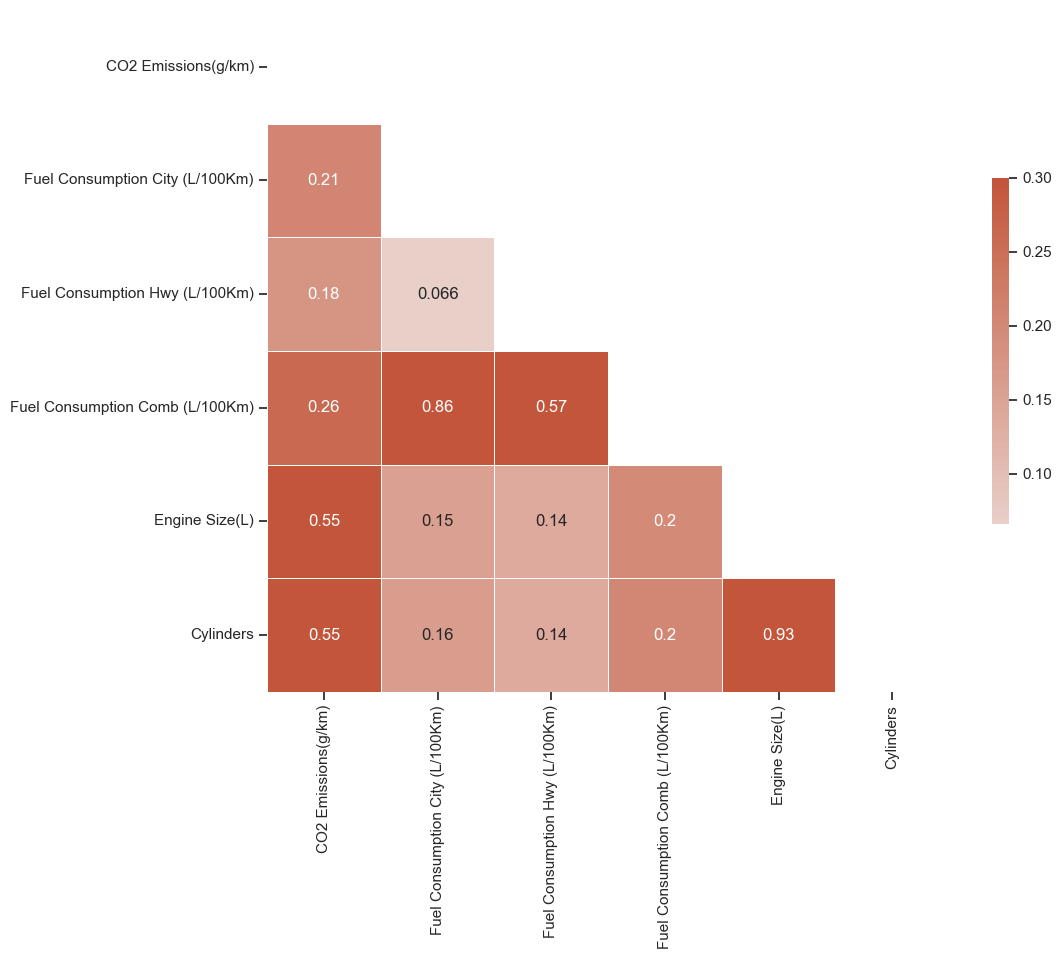

In [ ]:
# Compute the correlation matrix
corr = df_numerical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

plt.show()

## association (category and numerical)

c:\Users\sesar\Documents\_PROJECTS\bebass\venv\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


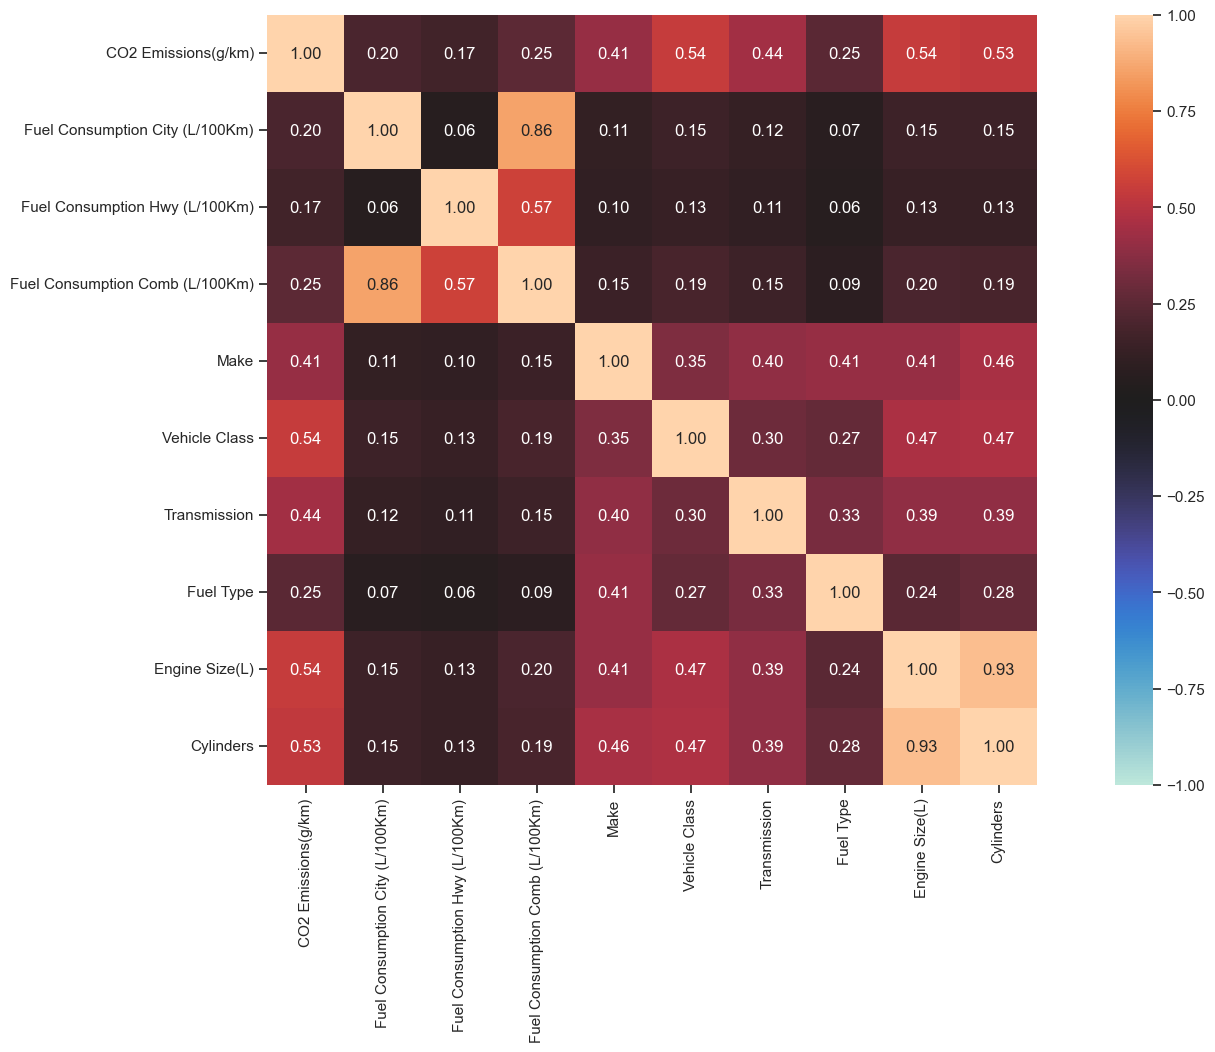

In [ ]:
# associations(df, figsize=(20, 10))
associations(df, figsize=(20, 10), nan_strategy="drop_samples")
print()

# Drop and re-analyze

In [ ]:
df_dropped = df.dropna()

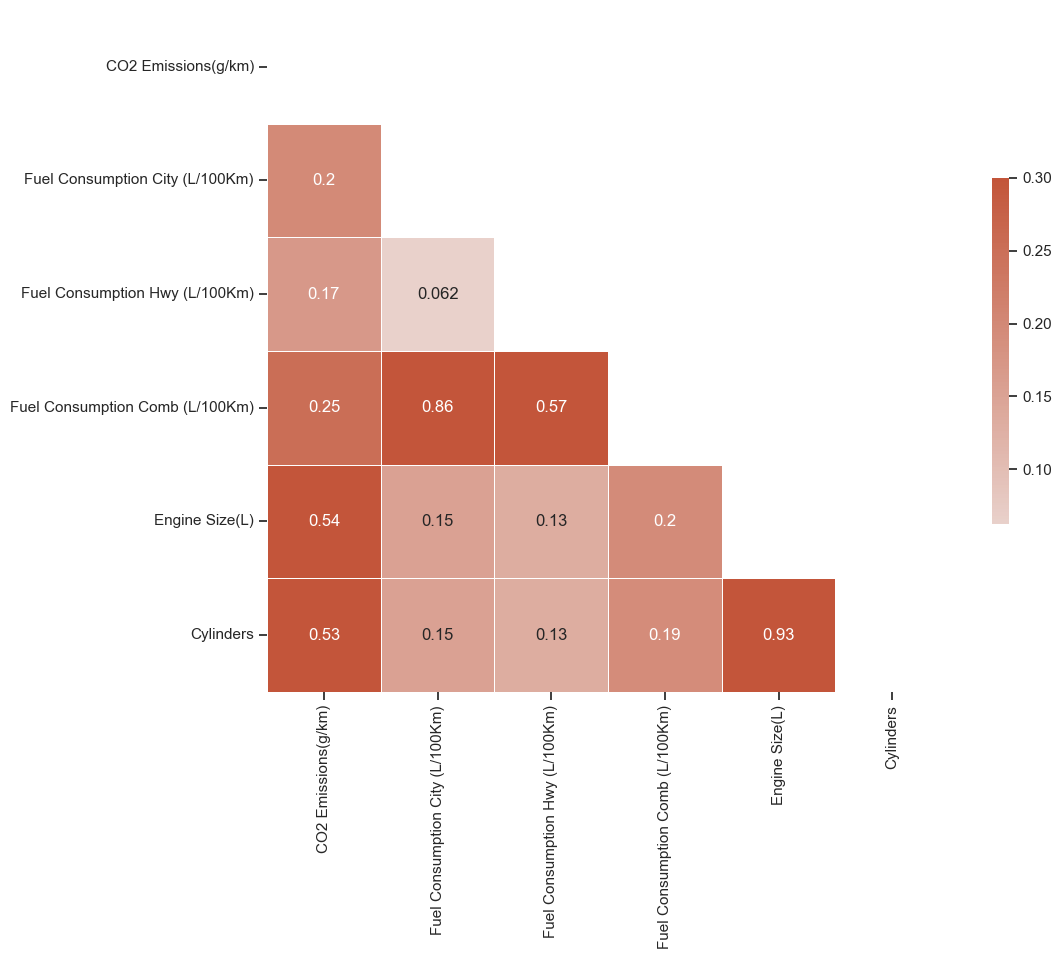

In [ ]:
df_numerical_dropped = df_dropped.select_dtypes(include=["int64", "float64"])

# Compute the correlation matrix
corr = df_numerical_dropped.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

plt.show()

c:\Users\sesar\Documents\_PROJECTS\bebass\venv\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


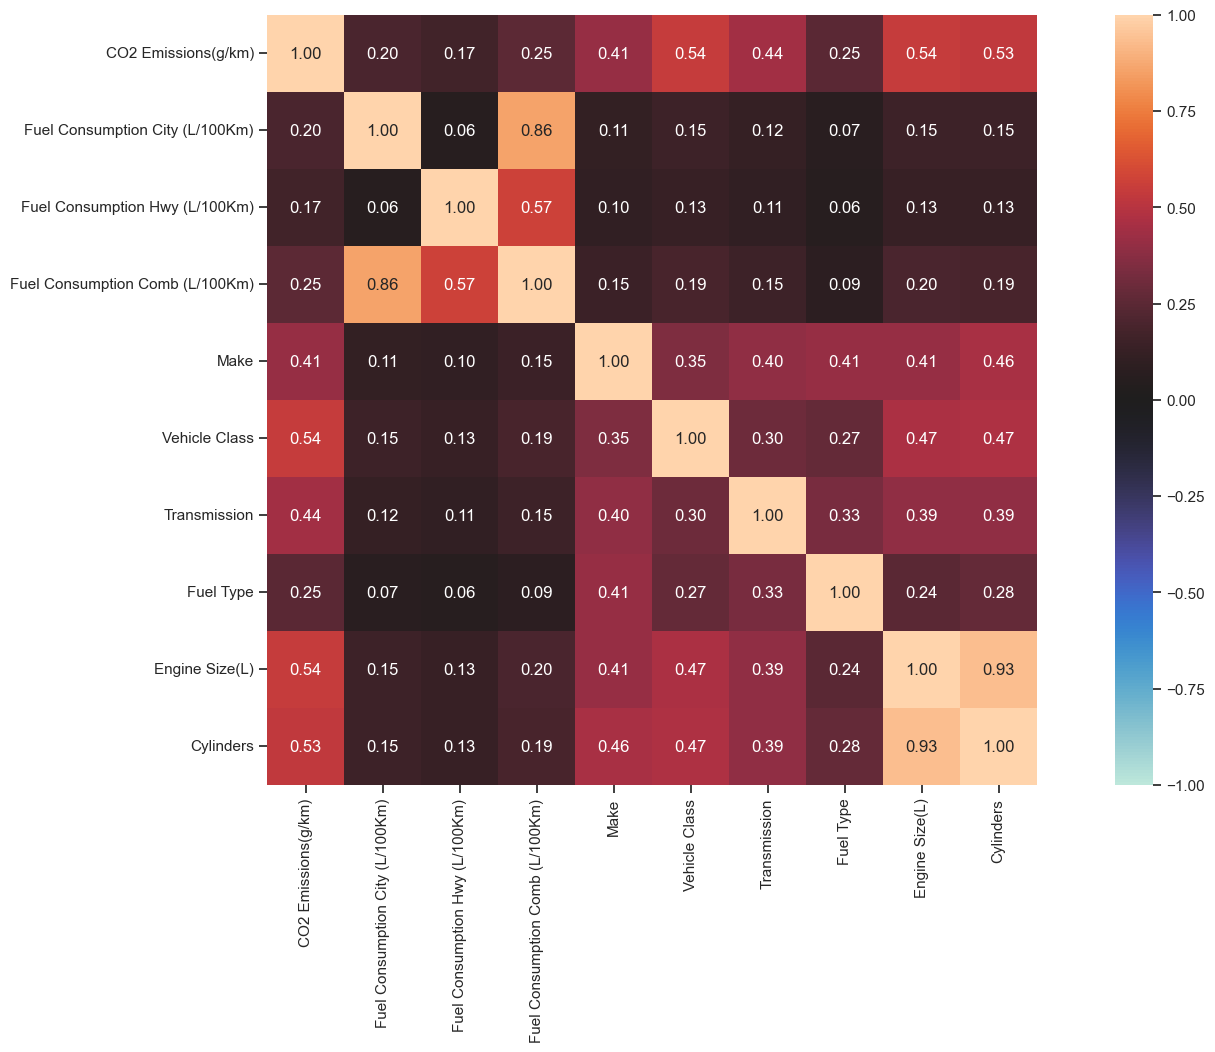

In [ ]:
associations(df_dropped, figsize=(20, 10), nan_strategy="drop_samples")
print()